In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.losses import MeanAbsoluteError

import warnings
warnings.filterwarnings("ignore")


# Define the path to the CSV file
data_file_path = "C:/Users/wdd45/OneDrive/바탕 화면/딥러닝응용/WISDM.csv"

# Load the data from the CSV file
data = pd.read_csv(data_file_path)

# Encode non-numeric labels to numeric values
label_encoder = LabelEncoder()
data['activity'] = label_encoder.fit_transform(data['activity'])


# Define the sequence length (number of time steps in each sequence)
n_steps = 64  # Adjust the sequence length

In [15]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix > len(sequences):
            break
        seq_x, seq_y = sequences[i:end_ix, :-1].astype('float32'), sequences[end_ix-1, -1].astype('float32')
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [16]:
# Extract features and labels from the dataset
data = data.values
X, y = split_sequences(data, n_steps)

# Convert data to float32
X = X.astype('float32')
y = y.astype('float32')

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Reshape the data to 2D for scaling
X_train_2d = X_train.reshape(X_train.shape[0] * n_steps, -1)
X_test_2d = X_test.reshape(X_test.shape[0] * n_steps, -1)


In [19]:
# Min-Max 스케일링
scaler = MinMaxScaler()
X_train_2d = scaler.fit_transform(X_train_2d)
X_test_2d = scaler.transform(X_test_2d)

In [20]:
# Reshape the data back to 3D
X_train = X_train_2d.reshape(X_train.shape[0], n_steps, -1)
X_test = X_test_2d.reshape(X_test.shape[0], n_steps, -1)

In [21]:
# Create an LSTM model with 'mean_absolute_error' loss
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, X_train.shape[2])))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.compile(optimizer='adam', loss=MeanAbsoluteError())  # Use Mean Absolute Error for regression


In [22]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
27454/27454 [==============================] - ETA: 0s - loss: 3.4349WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002091FE6F8B8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach th

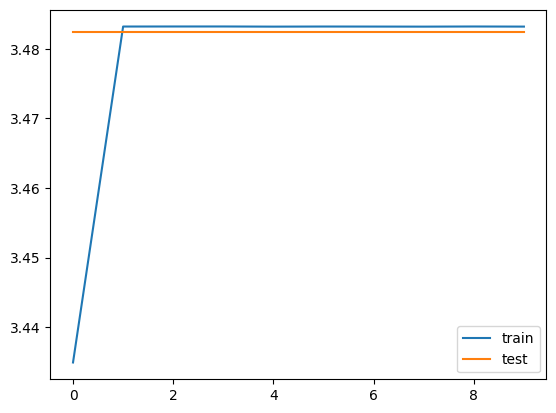

In [23]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


6864/6864 [==============================] - 52s 8ms/step


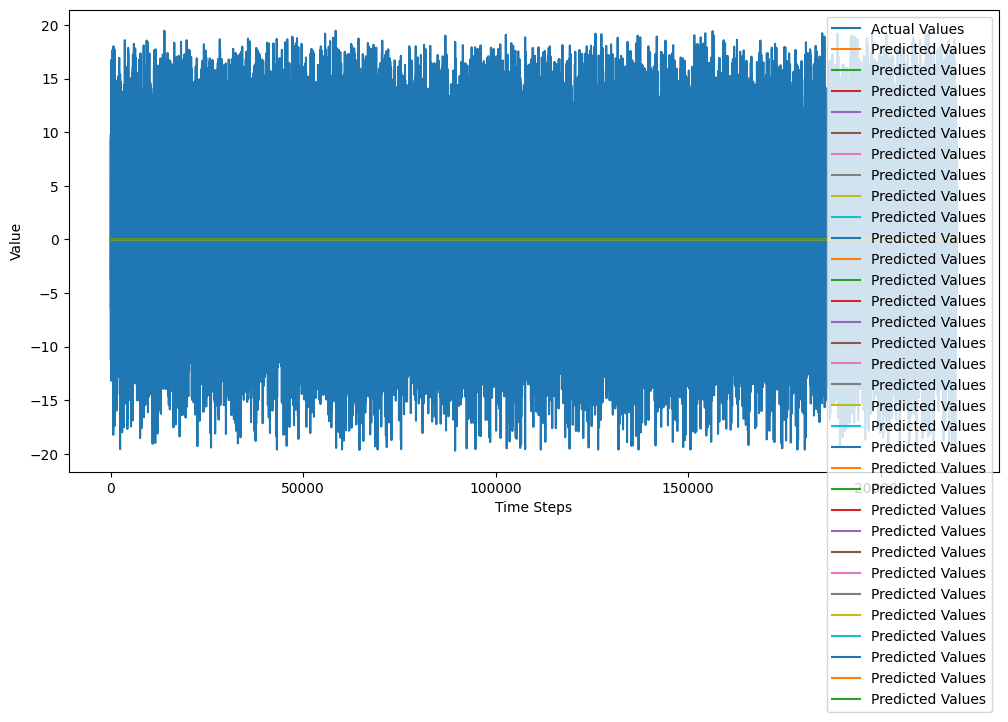

In [26]:
y_pred = model.predict(X_test)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()
